In [ ]:
# Edit on Mar 2, 2023
# This notebook is used to check the distribution of miRNA expression in the Beat AML dataset. 

In [1]:
#import libraries
import pandas as pd
import seaborn as sns

In [2]:
GE = pd.read_csv("../../../Data_resource/RPKM.csv",index_col = "Unnamed: 0") # Beat AML wave 1/2
GE.index = GE['Gene']

In [3]:
#gene id mapping
gene_map = GE.loc[:,['Gene','Symbol']]
dic_gene_map = {}
for i in range(0,gene_map.shape[0]):
    dic_gene_map[gene_map.iloc[i,0]] = gene_map.iloc[i,1]
    dic_gene_map[gene_map.iloc[i,1]] = gene_map.iloc[i,0]
    
# full gene list and sample list
gene_list = (list(GE.index))
sample_list = list(set(GE.columns) - set(['Gene','Symbol']))

# Formated input gene expression matrix
input_data = GE.loc[list(gene_list), sample_list]

In [4]:
miRNA_tar_KG = pd.read_csv("~/Documents/GitHub_project/fastqpi_BigGIM/KGs/miRTarBase/KG_miRNA_target_edges.csv") # downloaded from miRTarBase


In [5]:
miRNA_list = list(set(miRNA_tar_KG['Subject']).intersection(set(GE['Symbol'])))

In [6]:
miRNA_tar_KG_sub = miRNA_tar_KG.loc[miRNA_tar_KG['Subject'].isin(miRNA_list)]

In [7]:
len(set(miRNA_tar_KG_sub['Subject']))

50

In [45]:
df = GE.loc[GE['Symbol'].isin(miRNA_list)].sort_values(by = ['Symbol']).iloc[0:50,2:].transpose()
labels = GE.loc[GE['Symbol'].isin(miRNA_list)].sort_values(by = ['Symbol']).iloc[0:50,1].values
df.median()

df_median = pd.DataFrame({"Gene":df.median().index, "Median":df.median().values, "Symbol":labels})

new_order_ensg = list(df_median.sort_values(by = ['Median'])['Gene'].values)
new_order_symbol = df_median.sort_values(by = ['Median'])['Symbol'].values


In [48]:
#new_order_ensg

Text(0.5, 0, '')

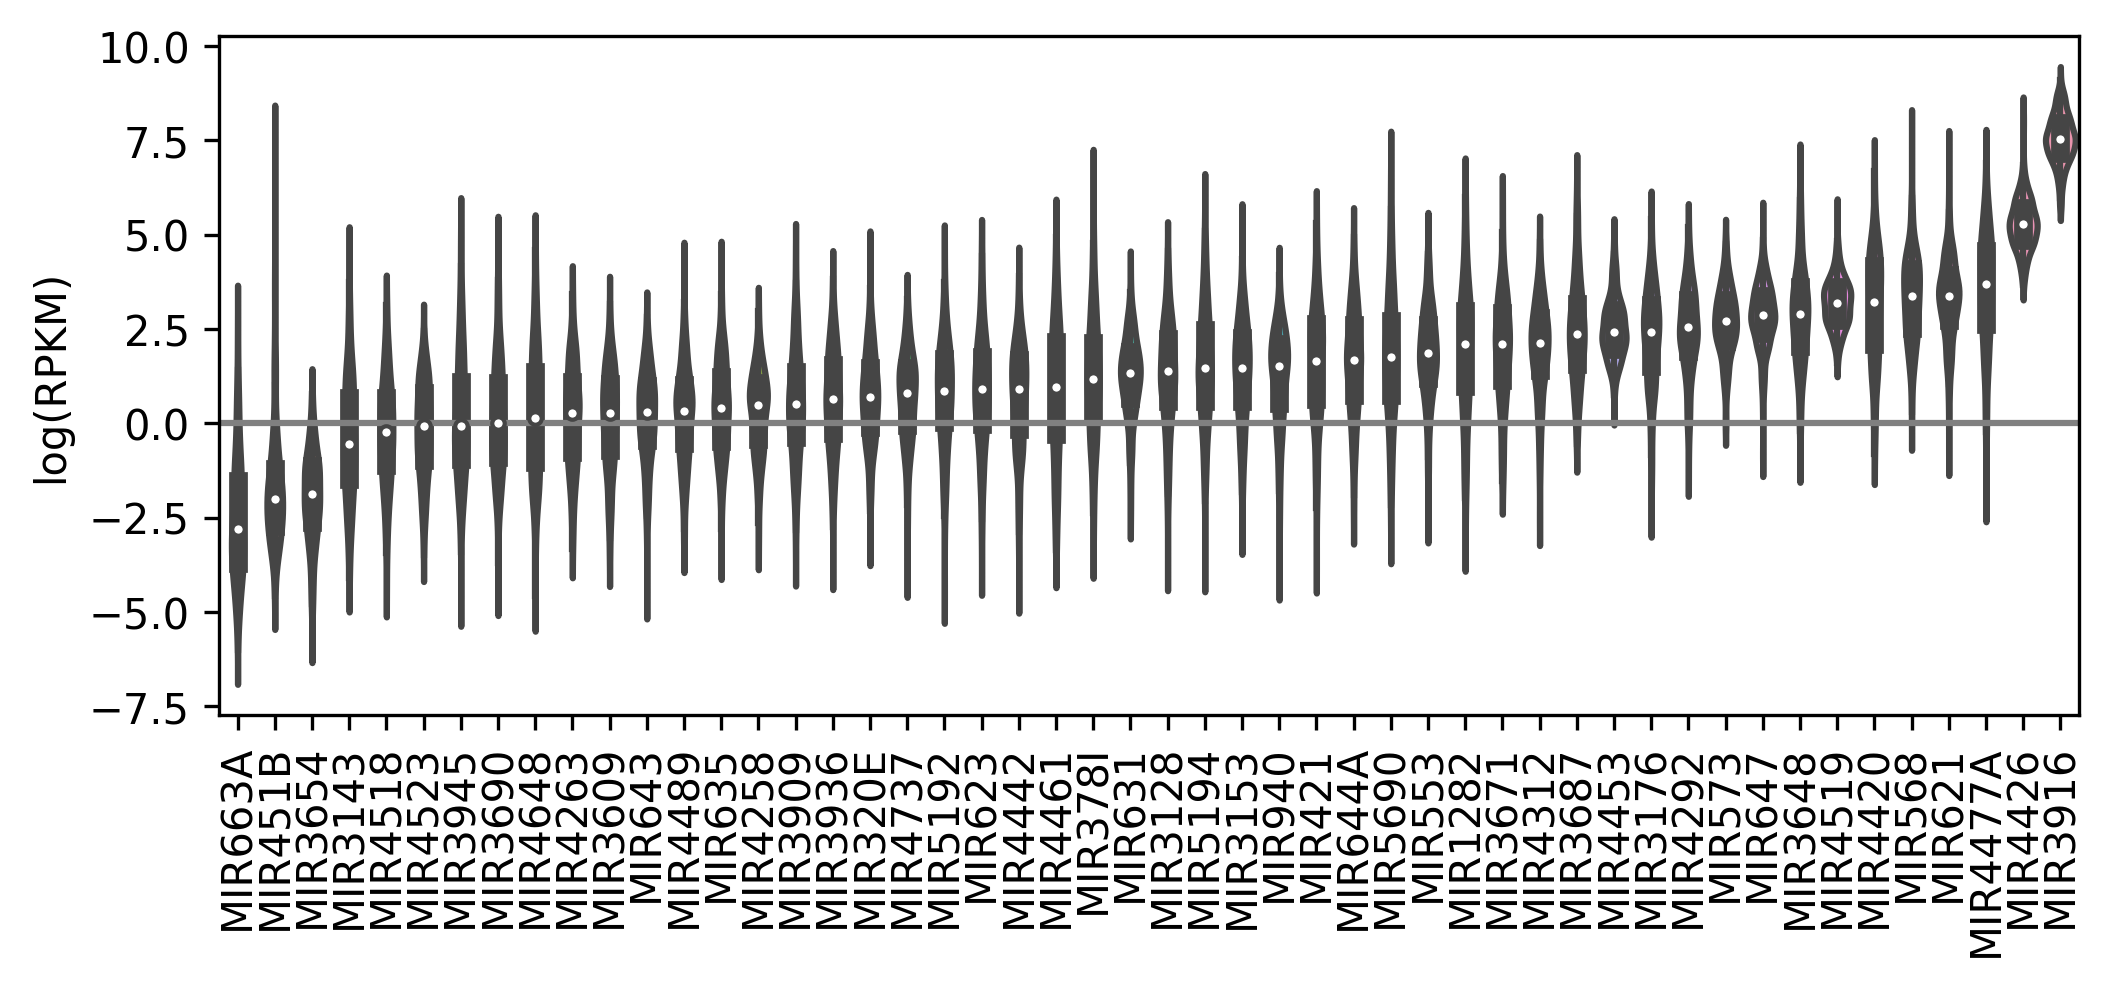

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,3),dpi = 300)
sns.violinplot(data=df, order=new_order_ensg)
plt.xticks(range(0,50), new_order_symbol, rotation = 90)
plt.axhline(y=0, color = 'grey')
plt.ylabel("log(RPKM)")
plt.xlabel("")